In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d forderation/breakhis-400x

 98% 790M/803M [00:09<00:00, 99.4MB/s]
100% 803M/803M [00:09<00:00, 88.6MB/s]


In [5]:
!unzip /content/breakhis-400x.zip

Archive:  /content/breakhis-400x.zip
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreaKHis 400X/

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
trainpath = '/content/BreaKHis 400X/train'
testpath = '/content/BreaKHis 400X/test'

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [25]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [26]:
input_shape = (224, 224, 3)
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


In [27]:
for layer in vgg.layers:
  print(layer)

In [28]:
for layer in vgg.layers:
  layer.trainable = False

In [29]:
x= Flatten()(vgg.output)

In [30]:
output = Dense(1, activation='sigmoid')(x)

In [31]:
vgg19 = Model(vgg.input,output)

In [32]:
vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
vgg19.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
epochs = 10
vgg19.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/10
72/72 [==============================] - 37s 509ms/step - loss: 0.6783 - accuracy: 0.6524 - val_loss: 0.4731 - val_accuracy: 0.7927
Epoch 2/10
72/72 [==============================] - 39s 548ms/step - loss: 0.4295 - accuracy: 0.8005 - val_loss: 0.4504 - val_accuracy: 0.8165
Epoch 3/10
72/72 [==============================] - 36s 505ms/step - loss: 0.4096 - accuracy: 0.8084 - val_loss: 0.4444 - val_accuracy: 0.7761
Epoch 4/10
72/72 [==============================] - 37s 510ms/step - loss: 0.3464 - accuracy: 0.8380 - val_loss: 0.4279 - val_accuracy: 0.7927
Epoch 5/10
72/72 [==============================] - 37s 508ms/step - loss: 0.2849 - accuracy: 0.8807 - val_loss: 0.4304 - val_accuracy: 0.7945
Epoch 6/10
72/72 [==============================] - 36s 507ms/step - loss: 0.2669 - accuracy: 0.8911 - val_loss: 0.3874 - val_accuracy: 0.8202
Epoch 7/10
72/72 [==============================] - 37s 511ms/step - loss: 0.2578 - accuracy: 0.8946 - val_loss: 0.3953 - val_accuracy: 0.8330

In [37]:
vgg19.save("brestcancer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [39]:
def resize_image(image, size=(256, 256)):
    return tensorflow.image.resize(image, size)

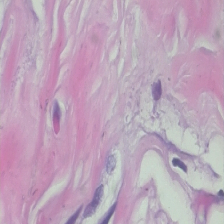

In [40]:
# testing 1

img = image.load_img('/content/BreaKHis 400X/train/benign/SOB_B_A-14-22549AB-400-002.png',target_size =(224,224))
img

In [41]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg19.predict(x))
op =['benign','malignant']
op[pred]

1/1 [==============================] - 0s 171ms/step


'benign'

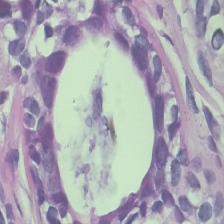

In [52]:
# testing 2

img = image.load_img('/content/BreaKHis 400X/train/benign/SOB_B_A-14-22549AB-400-006.png',target_size =(224,224))
img

In [53]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg19.predict(x))
op =['benign','malignant']
op[pred]

1/1 [==============================] - 0s 18ms/step


'benign'

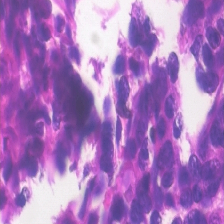

In [58]:
# testing 3

img = image.load_img('/content/BreaKHis 400X/train/malignant/SOB_M_DC-14-11951-400-010.png',target_size =(224,224))
img

In [60]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg19.predict(x))
op =['benign','malignant']
op[pred]

1/1 [==============================] - 0s 19ms/step


'malignant'